**Universidad Nacional Abierta y a Distancia**

Curso: Análisis de datos

Freddy Ernesto Sanchez Jerez

Tarea 4. Algoritmos de Aprendizaje Supervisado

# Tabla de contenido

1. Introduccion

    * 1.1 Ajustar ambiente de programación
    * 1.2 Cargar información

2. Diseño de Modelos de Clustering

    * 2.1 Análisis exploratorio de datos
    * 2.2 Preprocesamiento de datos
    * 2.3 Selección de características
    * 2.4 Entrenamiento y prueba de datos
    * 2.5 Entrenar Modelo
    * 2.6 Evaluar desempeño
    * 2.7. Visualización de resultados
    * 2.8. Interpretación y análisis
  
3. Conclusiones

# 1. Introducción

En esta tarea se diseñan los modelos de Clustering (agrupación): K-means e hierarchical clustering Siguiendo el mismo paso a paso para cada modelo. 

## 1.1. Ajustar ambiente de programación

In [ ]:
## Instalar librerias necesarias
#!pip install pandas
#!pip install matplotlib
#!pip install -U scikit-learn
#!pip install kagglehub
#!pip install seaborn
#!pip install scikit-learn


In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as shc

import warnings # silenciar advertencias
warnings.filterwarnings("ignore")

## 1.2. Carga información

### Importación Dataset y Exploración del conjunto de datos

In [4]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

# 2. Diseño de Modelos de Clustering

Con el dataset anterior diseñar los modelos de Clustering (agrupación): K-means e hierarchical clustering.

## 2.1. Análisis exploratorio de datos
Limpieza y codificación de variables necesarias

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

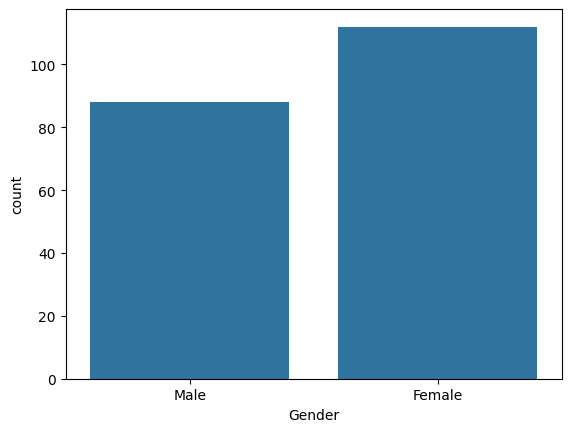

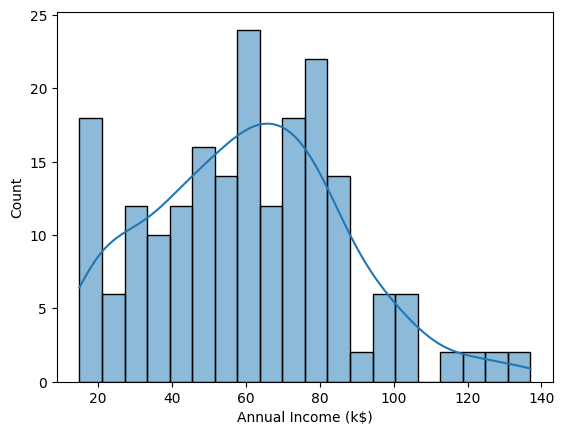

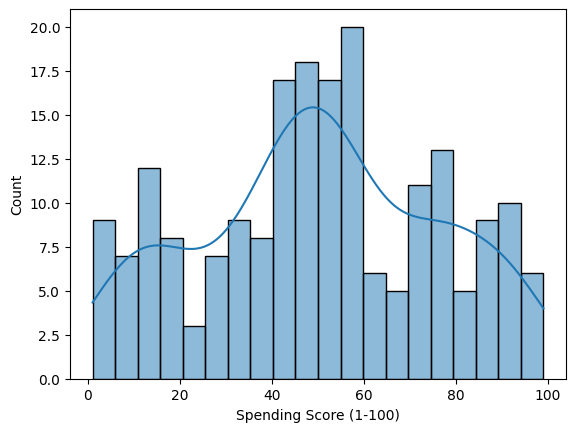

In [5]:
# Mostrar las primeras filas para inspeccionar el conjunto de datos
print(df.head())

# Resumen estadístico de las variables
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Visualización de distribución de género, ingreso y puntaje de gasto
sns.countplot(data=df, x='Gender')
plt.show()
sns.histplot(data=df, x='Annual Income (k$)', bins=20, kde=True)
plt.show()
sns.histplot(data=df, x='Spending Score (1-100)', bins=20, kde=True)
plt.show()

## 2.2. Preprocesamiento de datos

Codificación de columnas necesarias para el clustering y escalamiento de los datos para mejorar la precisión del Clustering

In [6]:
# Codificar la columna 'Gender' a valores numéricos
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar solo las columnas necesarias para el clustering
data = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar los datos para mejorar la precisión del clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## 2.3. Selección de características

En este caso utilizaremos todas las variables disponibles. Alternativamente puedes evaluar la importancia de las características mediante análisis adicionales.

## 2.4 Entrenamiento y prueba de datos

Probamos diferentes valores de k para elegir el mejor número de clusters.

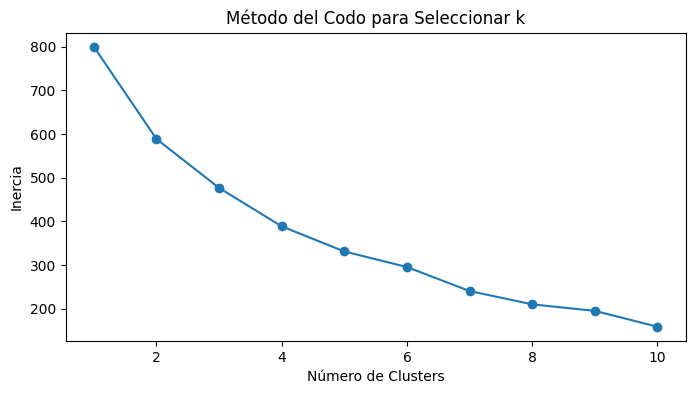

In [7]:
# Usar el método del codo para determinar el mejor valor de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar k')
plt.show()

# Entrenar el modelo con el número óptimo de clusters (por ejemplo, k=5)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

## 2.5 Entrenar Modelo
Entrenamiento del Modelo de Clustering Jerárquico donde aplicaremos clustering jerárquico y generaremos un dendrograma para visualizar la agrupación.

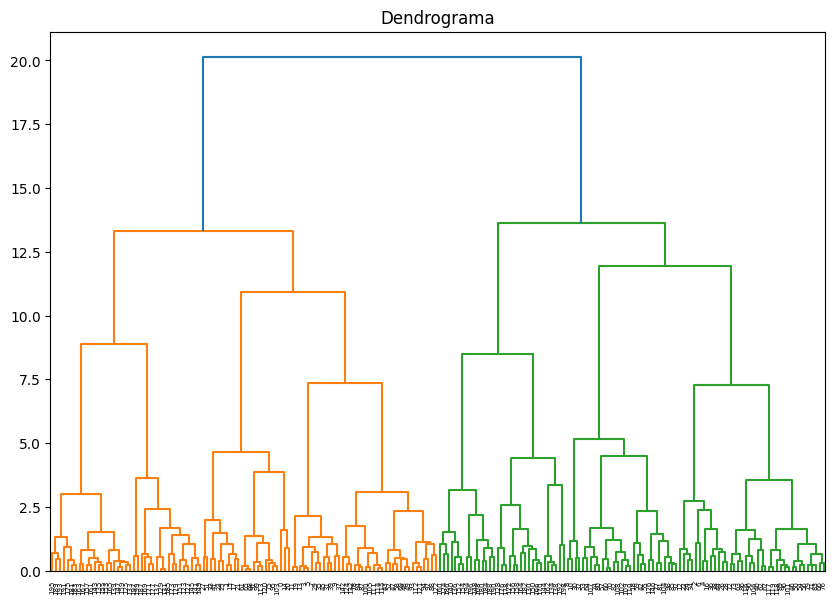

In [9]:
# Dendrograma para el clustering jerárquico
plt.figure(figsize=(10, 7))
plt.title('Dendrograma')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

# Entrenar el modelo con el número óptimo de clusters (por ejemplo, 5)
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

## 2.6 Evaluar desempeño
Evaluación del Desempeño del Modelo en donde usamos métricas de clustering como el Coeficiente de Silhouette y el Índice de Calinski-Harabasz para evaluar los modelos.

In [10]:
# Evaluar K-means
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

# Evaluar Clustering Jerárquico
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(data_scaled, hierarchical_labels)

print("K-means Silhouette Score:", kmeans_silhouette)
print("K-means Calinski-Harabasz Index:", kmeans_calinski)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)
print("Hierarchical Clustering Calinski-Harabasz Index:", hierarchical_calinski)

K-means Silhouette Score: 0.31780697133020747
K-means Calinski-Harabasz Index: 68.98051807187825
Hierarchical Clustering Silhouette Score: 0.28699413201651747
Hierarchical Clustering Calinski-Harabasz Index: 64.46870730105833


## 2.7. Visualización de resultados
Visualización de los Resultados donde visualizaremos los clusters para entender mejor los grupos creados.

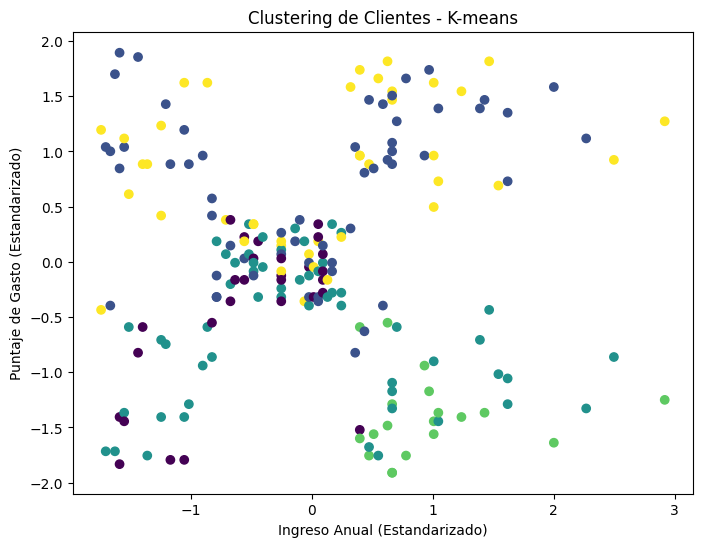

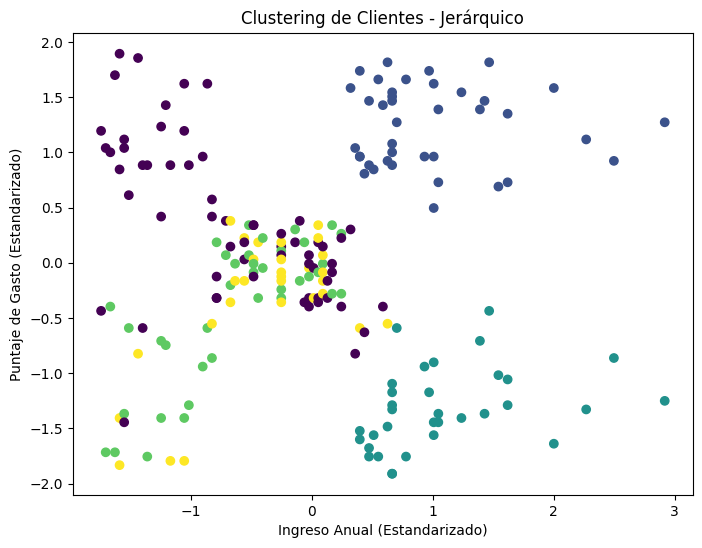

In [11]:
# Visualización de K-means en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 2], data_scaled[:, 3], c=kmeans_labels, cmap='viridis')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.title('Clustering de Clientes - K-means')
plt.show()

# Visualización de clustering jerárquico en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 2], data_scaled[:, 3], c=hierarchical_labels, cmap='viridis')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.title('Clustering de Clientes - Jerárquico')
plt.show()

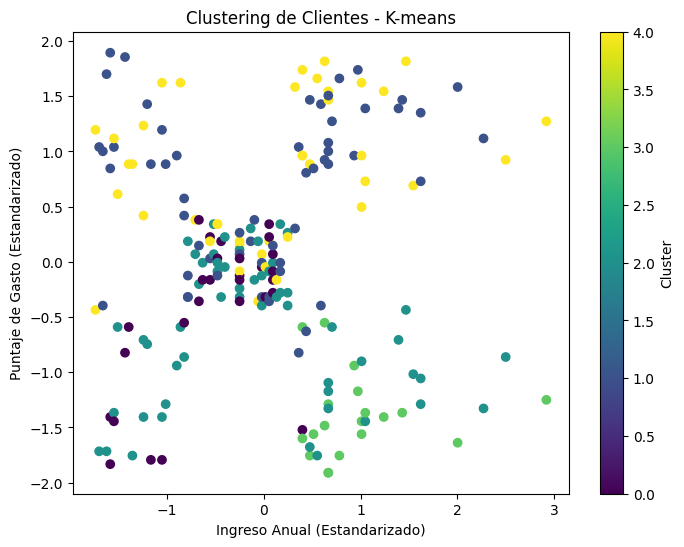

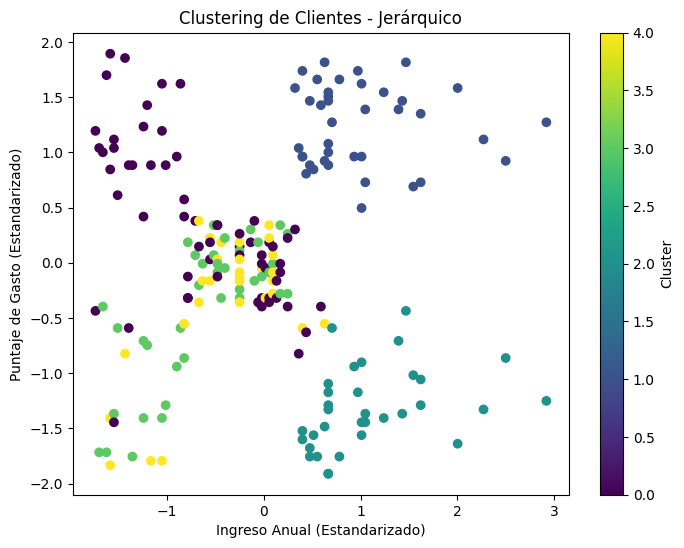

In [12]:
import matplotlib.pyplot as plt

# Visualización de K-means en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 2], data_scaled[:, 3], c=kmeans_labels, cmap='viridis')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.title('Clustering de Clientes - K-means')
plt.colorbar(label='Cluster')
plt.show()

# Visualización de clustering jerárquico en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 2], data_scaled[:, 3], c=hierarchical_labels, cmap='viridis')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.title('Clustering de Clientes - Jerárquico')
plt.colorbar(label='Cluster')
plt.show()

## 2.8. Interpretación y Análisis
En esta etapa, interpretaremos los clusters generados y documentaremos los resultados observados.

### Análisis de Resultados: Clustering de Clientes mediante K-means y Clustering Jerárquico

### Contexto
Los gráficos generados representan dos enfoques de agrupamiento (clustering) aplicados a un conjunto de datos de clientes. Las variables visualizadas en ambos gráficos corresponden a dos características estandarizadas de los clientes: **Ingreso Anual** y **Puntaje de Gasto**. Ambas características han sido transformadas para facilitar una interpretación consistente de los resultados.

### Visualización de K-means

1. **Configuración del Gráfico**:
   - **Ejes**: El eje X corresponde al "Ingreso Anual (Estandarizado)" y el eje Y al "Puntaje de Gasto (Estandarizado)".
   - **Colores y Etiquetas**: Cada punto representa un cliente, y el color de cada punto indica el grupo (cluster) asignado por el algoritmo K-means, que utiliza el parámetro `cmap='viridis'` para diferenciar los grupos por color.
   - **Tamaño**: La figura de 8x6 permite observar la dispersión y distribución de los clusters con claridad.

2. **Interpretación**:
   - El gráfico muestra cómo el algoritmo K-means ha agrupado a los clientes en distintas categorías basadas en similitudes en ingreso anual y comportamiento de gasto.
   - La distribución de colores permite observar la separación y cohesión interna de los clusters, indicando qué tan bien define el modelo K-means las agrupaciones.
   - Si los puntos de un color se agrupan de manera compacta y alejada de otros clusters, se puede inferir una buena cohesión dentro de cada grupo y una separación clara entre grupos.

3. **Observaciones de Análisis**:
   - La presencia de clusters bien definidos, sin superposición significativa, sugiere que K-means ha identificado patrones de segmentación sólidos.
   - Cualquier solapamiento o mezcla de colores entre clusters podría indicar la necesidad de ajustar el número de clusters o que las variables utilizadas no son suficientemente distintivas para una segmentación precisa.

### Visualización de Clustering Jerárquico

1. **Configuración del Gráfico**:
   - Los ejes y etiquetas son los mismos que en el gráfico de K-means, representando el "Ingreso Anual (Estandarizado)" en el eje X y el "Puntaje de Gasto (Estandarizado)" en el eje Y.
   - Los puntos en el gráfico están coloreados de acuerdo con los grupos resultantes del clustering jerárquico, utilizando la misma escala de color `cmap='viridis'` para coherencia visual entre ambas visualizaciones.

2. **Interpretación**:
   - Este gráfico refleja cómo el algoritmo de clustering jerárquico ha segmentado a los clientes. Dado que el clustering jerárquico se basa en la construcción de una estructura en árbol (dendrograma) que organiza los datos en un orden jerárquico, la agrupación puede diferir de la obtenida por K-means.
   - Es común que el clustering jerárquico genere estructuras más naturales o basadas en proximidad relacional, lo que puede resultar en grupos de distintos tamaños y formas comparado con K-means.

3. **Observaciones de Análisis**:
   - Si el clustering jerárquico muestra grupos compactos y bien diferenciados, indica que este método ha captado efectivamente las relaciones jerárquicas o proximidades naturales en los datos.
   - Comparando ambos gráficos, podemos evaluar si las agrupaciones coinciden, lo que podría reforzar la validez de los clusters obtenidos. Si los grupos son distintos en ambas visualizaciones, es posible que cada algoritmo esté capturando diferentes aspectos de los datos.
   
4. **Análisis de las Visualizaciones**

Ambas visualizaciones ofrecen una perspectiva de la segmentación de clientes según ingreso y puntaje de gasto. La comparación entre K-means y clustering jerárquico proporciona información valiosa para la toma de decisiones, pues cada método puede resaltar diferentes patrones en los datos. Al revisar ambos resultados, se puede decidir cuál de los dos algoritmos de clustering resulta más útil o si es necesario ajustar parámetros o aplicar técnicas adicionales para una mejor segmentación.